# Database Application
---
**Author:** Jacob Redmon, Christina Porter 
**Version:** 1.0  
**Semester:** Spring 2021  
**Summary:**  

This project has two goals: 1) is for you to apply the exploratory analysis techniques you have learned this semester to prepare a dataset and 2) implement a machine learning (ML) model.

## I. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## II. Data Set Description

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The columns are in a sensible order, so no need to rearrange them.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The column `company` is mainly empty, so we will drop it entirely. To clean the rest of the data, we will drop any rows that have any empty data using the `dropna()` function. Next, we need to reset the index to compensate for the dropped rows. We now have `102894` rows, dropped from `119390`.

In [7]:
dfa = df.drop(columns='company')
dfa = dfa.dropna()
dfa = dfa.reset_index(drop=True)
len(dfa.index)

102894

In [8]:
dfa.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## III. Data Set Summary Statistics

In [9]:
dfb = dfa.describe().T
dfb

,count,mean,std,min,25%,50%,75%,max
is_canceled,102894.0,0.390314,0.487823,0.00,0.0,0.0,1.0,1.0
lead_time,102894.0,111.740092,107.681013,0.00,26.0,79.0,169.0,629.0
arrival_date_year,102894.0,2016.156977,0.706117,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,102894.0,27.339155,13.279990,1.00,17.0,28.0,38.0,53.0
arrival_date_day_of_month,102894.0,15.786771,8.794042,1.00,8.0,16.0,24.0,31.0
stays_in_weekend_nights,102894.0,0.978181,1.003991,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,102894.0,2.589655,1.905941,0.00,1.0,2.0,3.0,41.0
adults,102894.0,1.899926,0.490891,0.00,2.0,2.0,2.0,26.0
children,102894.0,0.111231,0.411982,0.00,0.0,0.0,0.0,10.0
babies,102894.0,0.007697,0.097089,0.00,0.0,0.0,0.0,10.0


Function to calculate the proportion for categorical variables.

In [10]:
def proportion(x):
    x = x / 102894 * 100
    return x

Function to generate CSV files for proportion tables for categorical variables.

In [11]:
def prop_table(x):
    dfc = dfa[x].groupby(dfa[x]).count().to_frame()
    dfc.insert(1, 'proportion', dfc[x].apply(proportion))
    dfc.to_csv('proportion_tables/'+ x + '_proportion.csv')
    return dfc

In [12]:
categorical = ['hotel', 'arrival_date_month', 'meal', 
               'country', 'market_segment', 'distribution_channel',
               'reserved_room_type', 'assigned_room_type', 'deposit_type', 
               'customer_type', 'reservation_status', 'reservation_status_date']

In [14]:
for x in categorical:
    prop_table(x)

In [15]:
dfd = dfa[['is_canceled', 'lead_time', 'arrival_date_year',
           'arrival_date_week_number', 'arrival_date_day_of_month',
           'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'babies', 'is_repeated_guest', 'previous_cancellations',
           'previous_bookings_not_canceled', 'booking_changes', 'agent', 
           'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
           'total_of_special_requests']].corr()

In [16]:
dfd.to_csv('correlation_matrix.csv')

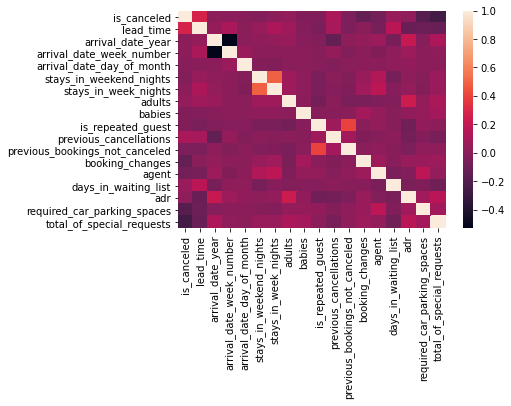

In [17]:
heatmap = sns.heatmap(dfd)
fig = heatmap.get_figure()

In [18]:
fig.savefig('corr_heatmap.png')